# Crash data 

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import date2num
import seaborn as sns
import chart_studio.plotly as py
import plotly.tools as tls
sns.set(style="whitegrid")

In [3]:
# read data
df = pd.read_csv('Madison_crash_2009_2019.csv')

/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
# Check if column in interest is actually in the dataframe
columns = list(df.columns)
column_interested = ["VEHTYPE1", "VEHTYPE2", "WTHRCOND"]
for flag in column_interested:
    if flag in columns:
        print(flag+ " is availible")

VEHTYPE1 is availible
VEHTYPE2 is availible
WTHRCOND is availible


In [5]:
#Check null value
df.isna().sum()

DOCTNMBR              0
ACCDDATE              0
NTFYHOUR              0
REGION                0
COUNTY                0
                  ...  
DRVRPC2           45775
STNM21            16884
STNM22            18021
WISLR_LATDECDG     3550
WISLR_LONDECDG     3550
Length: 66, dtype: int64

### What kind of vihicle were hit?

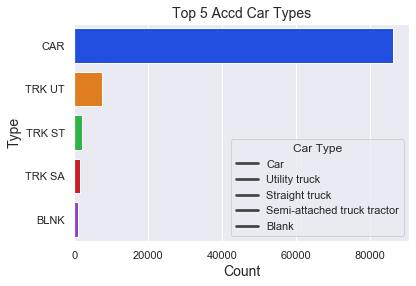

In [22]:
# get data in interest
fontSize = 14
v1 = df['VEHTYPE1'].value_counts().to_frame().reset_index()
v2 = df['VEHTYPE2'].value_counts().to_frame().reset_index()
v1.columns = ["type","count"]
v2.columns = ["type","count"]
v = v1
v["count"] = v1["count"] + v2["count"]
v = v.reset_index().sort_values(by = ['count'], ascending = False).head(5)

plot = sns.barplot(data = v, x = "count", y = "type", orient = "h", palette = 'bright')
plot.set_xlabel('Count', fontsize = fontSize)
plot.set_ylabel('Type', fontsize = fontSize)
plot.set_title('Top 5 Accd Car Types', fontsize = fontSize)
plot.legend(['Car', 'Utility truck', 'Straight truck', "Semi-attached truck tractor","Blank"], title='Car Type')

# Save plot
plot.figure.savefig('AccidCarType.png')

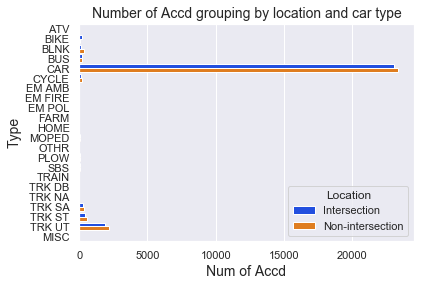

In [23]:
# Get plot: vehicle type 1 vs Location
fontSize = 14
VHTYPE_LOC = df.groupby(['ACCDLOC','VEHTYPE1']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
VHTYPE_LOC_plot = sns.barplot(x='DOCTNMBR', y='VEHTYPE1', hue='ACCDLOC', data=VHTYPE_LOC, palette = 'bright')
VHTYPE_LOC_LEG = VHTYPE_LOC_plot.get_legend_handles_labels()[0]
VHTYPE_LOC_plot.legend(VHTYPE_LOC_LEG, ['Intersection', 'Non-intersection'], title='Location')
VHTYPE_LOC_plot.set_title('Number of Accd grouping by location and car type', fontsize = 14)
VHTYPE_LOC_plot.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_LOC_plot.set_ylabel('Type', fontsize = fontSize)
VHTYPE_LOC_plot

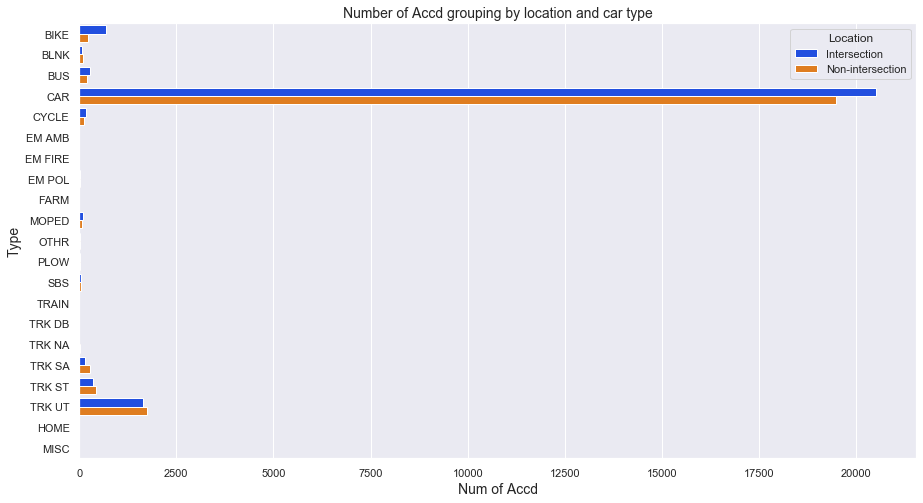

In [48]:
# Get plot: vehicle type 2 vs Location
fontSize = 14
VHTYPE_LOC = df.groupby(['ACCDLOC','VEHTYPE2']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
VHTYPE_LOC_plot = sns.barplot(x='DOCTNMBR', y='VEHTYPE2', hue='ACCDLOC', data=VHTYPE_LOC, palette = 'bright')
VHTYPE_LOC_LEG = VHTYPE_LOC_plot.get_legend_handles_labels()[0]
VHTYPE_LOC_plot.legend(VHTYPE_LOC_LEG, ['Intersection', 'Non-intersection'], title='Location')
VHTYPE_LOC_plot.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
VHTYPE_LOC_plot.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_LOC_plot.set_ylabel('Type', fontsize = fontSize)
VHTYPE_LOC_plot

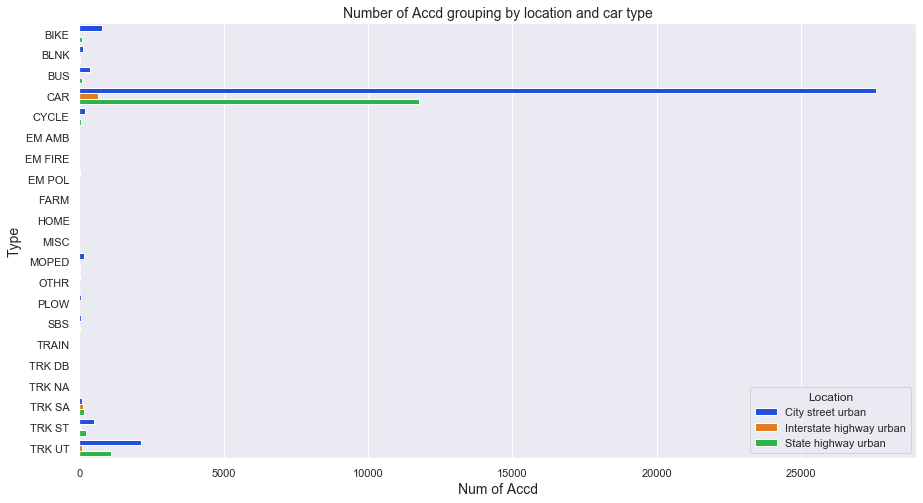

In [45]:
# Get plot: vehicle type 2 vs Road Type
fontSize = 14
VHTYPE_HWYCLASS = df.groupby(['HWYCLASS','VEHTYPE2']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
VHTYPE_HWYCLASS_PLOT = sns.barplot(x='DOCTNMBR', y='VEHTYPE2', hue='HWYCLASS', data=VHTYPE_HWYCLASS, palette = 'bright')
VHTYPE_HWYCLASS_LEG = VHTYPE_HWYCLASS_PLOT.get_legend_handles_labels()[0]
VHTYPE_HWYCLASS_PLOT.legend(VHTYPE_HWYCLASS_LEG, ['City street urban', 'Interstate highway urban', 'State highway urban'], title='Location')
VHTYPE_HWYCLASS_PLOT.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_ylabel('Type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT

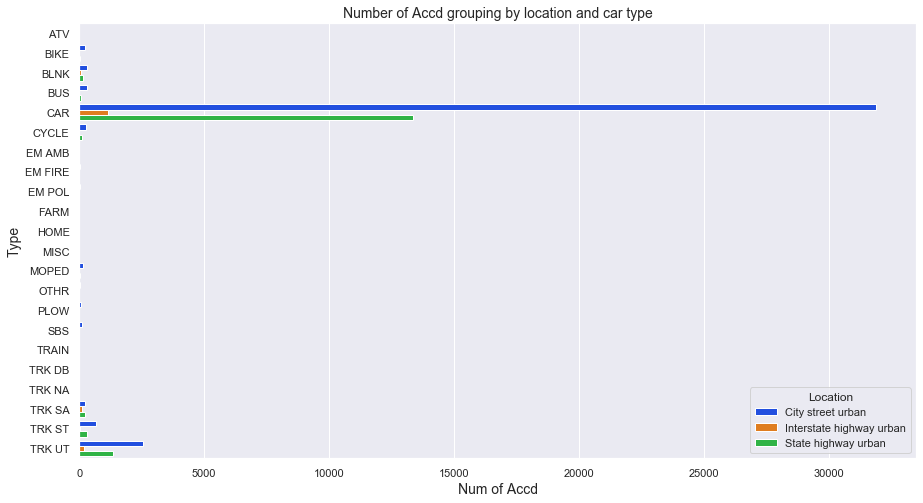

In [47]:
# Get plot: vehicle type 1 vs Road Type
fontSize = 14
VHTYPE_HWYCLASS = df.groupby(['HWYCLASS','VEHTYPE1']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
VHTYPE_HWYCLASS_PLOT = sns.barplot(x='DOCTNMBR', y='VEHTYPE1', hue='HWYCLASS', data=VHTYPE_HWYCLASS, palette = 'bright')
VHTYPE_HWYCLASS_LEG = VHTYPE_HWYCLASS_PLOT.get_legend_handles_labels()[0]
VHTYPE_HWYCLASS_PLOT.legend(VHTYPE_HWYCLASS_LEG, ['City street urban', 'Interstate highway urban', 'State highway urban'], title='Location')
VHTYPE_HWYCLASS_PLOT.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_ylabel('Type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT

"\n# seasonly plot\n# prepare data\ns = plt\nplt.figure(figsize=(20,10))\ns.hist(x = sort_date, color = 'black', edgecolor = 'white', bins = numSeason)\n# Add labels\nplt.title('Histogram of Seasonly Accident Count')\nplt.xlabel('Time')\nplt.ylabel('Count') \ns.show()\n\n# yearly plot\n# prepare data\ny = plt\nplt.figure(figsize=(20,10))\ny.hist(x = sort_date, color = 'gold', edgecolor = 'black', bins = numYear)\n# Add labels\nplt.title('Histogram of Yearly Accident Count')\nplt.xlabel('Time')\nplt.ylabel('Count') \ny.show()\n"

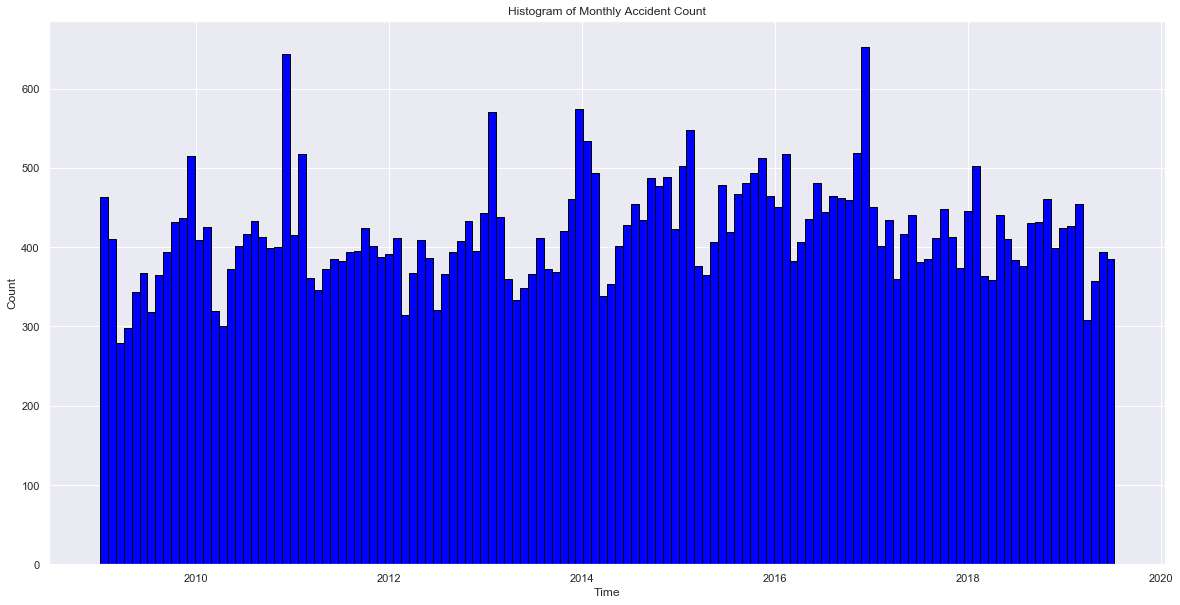

In [75]:
# date formatting
start = datetime.date(2009,1,1) 
end = datetime.date(2019,8,1)
monthBin = datetime.timedelta(days = 30)  
seasonBin = datetime.timedelta(days = 121) 
yearBin = datetime.timedelta(days = 365)  
months = []
seasons = []
years = []
for i in range(((end-start).days)//30 + 1):  
    months.append(start + (i)*monthBin)

for i in range(((end-start).days)//121 + 1):  
    seasons.append(start + (i)*seasonBin)

for i in range(((end-start).days)//365 + 1):  
    years.append(start + (i)*yearBin)

numMonth= date2num(months)
numSeason= date2num(seasons)
numYear = date2num(years)

# monthly plot
# prepare data
"""
fig, ax = plt.subplots()
data = np.random.rand(1000)

N, bins, patches = ax.hist(data, edgecolor='white', linewidth=1)

for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,5):    
    patches[i].set_facecolor('r')
for i in range(5, len(patches)):
    patches[i].set_facecolor('black')

plt.show()
"""
fig, ax = plt.subplots(figsize=(20,10))
sort_date = sorted(pd.to_datetime(df["ACCDDATE"]))
N, bins, patches = ax.hist(x = sort_date, color = 'blue', edgecolor = 'black', bins = numMonth)
"""
#colors = ["r","g","b","yellow","navy","grey","black","violet","pink","green"]
colors = ["r","g","b"]
for year in range(10):
    for month in range(12):
        cur_month = year *12 + month
        patches[cur_month].set_facecolor(colors[cur_month%len(colors)])
"""
# Add labels
plt.title('Histogram of Monthly Accident Count')
plt.xlabel('Time')
plt.ylabel('Count')

"""
# seasonly plot
# prepare data
s = plt
plt.figure(figsize=(20,10))
s.hist(x = sort_date, color = 'black', edgecolor = 'white', bins = numSeason)
# Add labels
plt.title('Histogram of Seasonly Accident Count')
plt.xlabel('Time')
plt.ylabel('Count') 
s.show()

# yearly plot
# prepare data
y = plt
plt.figure(figsize=(20,10))
y.hist(x = sort_date, color = 'gold', edgecolor = 'black', bins = numYear)
# Add labels
plt.title('Histogram of Yearly Accident Count')
plt.xlabel('Time')
plt.ylabel('Count') 
y.show()
"""


In [13]:
dfs.ACCDLOC

0        N
1        N
2        N
3        N
4        N
        ..
21398    I
21399    N
21400    I
21401    N
21402    N
Name: ACCDLOC, Length: 21403, dtype: object